In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [2]:
random.seed(1852026)

In [3]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [4]:
def initializeParams(N):
    n=2
    n_y=1
    W = np.random.randn(N,n) 
    bias = np.random.randn(N,1) 
    V = np.random.randn(n_y,N) 
    a=pd.DataFrame(V.T)
    a[2]=W[:,0]
    a[3]=W[:,1]
    a[4]=bias
    omega=np.matrix(a)
    
 
   
    return W,bias,V,omega

In [5]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [6]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [7]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])


n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 10 # size of the hidden layer, # neurons, this is just for the moment to have some example

In [8]:
df.head()

,x1,x2,y
0,-1.262271,0.746859,0.461002
1,-0.804355,0.937081,0.617336
2,-1.805674,0.738389,-0.053984
3,-0.888805,0.061711,1.943678
4,-1.667562,-0.534543,2.127070


# Question 1. (Full minimization)

### MLP network

In [9]:
W,bias,V,omega=initializeParams(6)
ro=10**-5 #10-5 unti, 10-3
sigma=1
N=5

In [10]:
print(V,'\n')
print(W,'\n')
print(bias)

[[-0.75323456  0.76953537  0.10175678 -0.60605169 -0.17079683  0.08226511]] 

[[ 2.00790355  0.2042346 ]
 [ 1.45155523 -0.13813537]
 [ 0.65803315 -0.3324613 ]
 [-1.37842882  0.24411295]
 [-0.2877458  -0.40294858]
 [-0.999343   -1.75223953]] 

[[ 1.26590553]
 [-1.79687891]
 [ 0.04733358]
 [ 0.23842442]
 [-0.33159508]
 [ 0.15481549]]


In [11]:
class MLP(object):
    
    def __init__(self, ro, sigma, N):
        self.ro = ro
        self.sigma = sigma 
        self.N = N

    def set_N(self, x): 
        self.N = x 
    def get_N(self): 
        return self.N     
    
    
    def second_norm(self,omega):
        return np.linalg.norm(omega)**2 

    def activation_f(self,t,sigma=1):
        return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)

    def predict(self,omega,X):  

        '''
        r=omega.flatten().shape[0]
        try:
            c=omega.flatten().shape[1]

            N=int(omega.shape[1]/4)

        except:
                N=int(omega.shape[0]/4)
                
        '''     
        N=self.N
        V=omega.T[:N].reshape(1,N)
        W=omega.T[N:N+2*N].reshape(N,2)

        bias=omega.T[N+2*N:].reshape(N,1)

        t=W.dot(X)-bias


        predicted_values=V.dot(self.activation_f(t,sigma))
        return predicted_values#, W,bias




    def reg_tr_error(self,omega,functionArgs):
        X=functionArgs[0]
        true=functionArgs[1]
        
        '''
        r=omega.flatten().shape[0]
        
        try:
            c=omega.flatten().shape[1]

            N=int(omega.shape[1]/4)

        except:
                N=int(omega.shape[0]/4)

        '''
        predicted=self.predict(omega,X)


        err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
        err_all=err.dot(err.T)


        P=X.shape[1]
        return ((err_all)/(2*P)+ro*self.second_norm(omega)).item(0)
    

  #  def get_params(self):
  #      return self.ro, self.sigma, self.N
    
  

In [12]:
W, bias, V, omega=initializeParams(7)
ro=10**-5 #10-5 unti, 10-3
sigma=1
N=7

In [13]:
mlp=MLP(ro,sigma,7)
mlp.reg_tr_error(omega.flatten(),[X_train,Y_train])

2.7303643549161323

In [14]:
mlp.get_N()

7

In [15]:
mlp.reg_tr_error(omega.flatten(),[X_train,Y_train])

2.7303643549161323

In [16]:
res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
print(res['fun'],'\n',res['x'])

0.03925299345979403 
 [ 6.78689257e-01  4.05263391e+00 -4.29499216e+00 -8.50077272e+00
 -4.16590196e+00  4.62119313e+00  8.57549625e-01 -2.01024726e-01
  5.51506522e+00  1.78655624e+00  3.61350068e-02 -6.32704583e-01
  5.91588488e-01  4.57500021e-01  2.05987426e-03  4.96415036e-01
 -2.24046442e-01  2.77960707e+00  3.29698387e-01 -4.32120665e-01
 -4.36798530e+00 -2.16052378e+00  1.07431404e+00  1.42808031e+00
  1.52206718e-02  2.07458012e+00  5.94527324e+00  4.21462588e+00]


In [17]:
res['x'].shape

(28,)

In [18]:
print(mlp.reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(mlp.reg_tr_error(res['x'].flatten(),[X_test,Y_test,N]))

0.07346081126052159
0.09844612846444498


$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [19]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed


#repeated CROSS Validation

In [20]:
def second_norm_jac(omega): 
    return np.linalg.norm(omega)

def mse(true,predicted):
    return (np.sum(np.array(true-predicted)**2))/true.shape[1]


def calculate_test_err(cv_data,neurons,rho,sigma,omega):
    err=[]
    Mlp=MLP(rho,sigma,neurons)
    for i in range(10):
        X_train = np.transpose(np.matrix(cv_data)[:,0:2])
        Y_train = np.transpose(np.matrix(cv_data)[:,2:])
        #train on data train and data validate
        res=minimize(Mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train,N],method='L-BFGS-B')
        omega=res['x']
        #test on test data
        err.append(mse(Y_test,Mlp.predict(omega.flatten(),X_test)))
    return np.mean(err)

In [21]:
W,bias,V,omega=initializeParams(N=3)
omega.flatten()

matrix([[ 1.11045494,  0.01801698, -0.07368231, -0.12539887, -0.04860584,
          2.21021504, -0.52429828,  1.6608248 , -0.74028365,  0.684231  ,
         -1.03246727, -0.49981169]])

In [22]:
def fivefoldCV(params):
    '''
    params a list N,rho,sigma
    '''
    global X_train, X_validate, X_test, Y_train, Y_validate, Y_test 

    K=5   # SO 4 folds for training 1-validation for testing; they switch every time
    cv_data=np.concatenate((data_train,data_validate))
    np.random.shuffle(cv_data)
    indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
    folds=[]



  #  X=X_train

  #  true=Y_train

    N=params[0]
    rho=params[1]#10**-5 #10-5 unti, 10-3
    sigma=params[2]#1

    W,bias,V,omega=initializeParams(N)

    mlp=MLP(rho,sigma,N)


    P=cv_data.shape[0]

    mlp.set_N(N)
    
    print(mlp.get_N())

    val_err_mse=[]
    train_err_mse=[]
    fun=[]
    jac_norm=[]

    #train_err={}
    #val_err={}

    data=cv_data.copy()


    res_df=pd.DataFrame(columns=['neurons','rho','sigma','fun','err_tr','jac_norm','err_val','err_test'])
    for i in range(len(indices)):
        cv_data=data
        if i<4:
            l=[i for i in range(indices[i],indices[i+1])]
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:indices[i+1],:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])



            X_train = np.transpose(np.matrix(train_cv)[:,0:2])
            Y_train = np.transpose(np.matrix(train_cv)[:,2:])
            X_validate = np.transpose(validate_cv[:,0:2])
            Y_validate = np.transpose(validate_cv[:,2:])

            print(omega.shape)
        #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
     #       for i in range(10):
     #           omega=res['x']
     #           res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            
            omega=res['x']
            fun.append(res['fun'])
            jac_norm.append(second_norm_jac(res['jac'].T))

        #    err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_tr=mse(Y_train,mlp.predict(omega.flatten(),X_train))
            err_val=mse(Y_validate,mlp.predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)
            
             
           # train_err_dict[i]=
          #  val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))


        else:
            #for the last element
            l=list([i for i in range(indices[i],255)])
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:,:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])

            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
          #  for i in range(10):
          #      omega=res['x']
          #      res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            
            omega=res['x']
            fun.append(res['fun'])
            jac_norm.append(second_norm_jac(res['jac'].T))


    
            err_tr=mse(Y_train,mlp.predict(omega.flatten(),X_train))
       #     err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_val=mse(Y_validate,mlp.predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)

      #      train_err_dict_mse[i]=mse(Y_train,predict(omega.flatten(),X_train))
       #     val_err_dict_mse[i]=mse(Y_validate,predict(omega,X_validate))

    err_test=calculate_test_err(cv_data,N,rho,sigma,omega)
    res_df=res_df.append({'neurons':N,'rho':rho,'sigma':sigma,'fun':np.mean(fun),\
                              'err_tr':np.mean(train_err_mse),'jac_norm':np.mean(jac_norm),\
                              'err_val':np.mean(val_err_mse),'err_test':err_test},ignore_index=True )
    return res_df

In [23]:
fivefoldCV([3,0.0001,1])

3
(3, 4)
(12,)
(12,)
(12,)


,neurons,rho,sigma,fun,err_tr,jac_norm,err_val,err_test
0,3.0,0.0001,1.0,0.119039,0.234476,0.000387,0.268663,0.335694


In [24]:
neurons_count=[3,6,7,9]#,11,20]
rho_values=[0.001,0.00001]
sigma_vals=[1,1.5]

all_poss_conf=[]
for i in neurons_count:
    for r in rho_values:
        for s in sigma_vals:
            all_poss_conf.append((i,r,s))

In [ ]:
from tqdm import tqdm
res_df=pd.DataFrame()
for conf in tqdm(all_poss_conf):
    res_df=res_df.append(fivefoldCV(conf))

In [ ]:
res_df.to_csv('cv_results.csv')

In [35]:
rho=all_poss_conf[-2][1]
sigma=all_poss_conf[-2][2]
N=all_poss_conf[-2][0]
W,bias,V,omega=initializeParams(N)

mlp=MLP(rho,sigma,N)
cv_data=np.concatenate((data_train,data_validate))
X_train = np.transpose(np.matrix(cv_data)[:,0:2])
Y_train = np.transpose(np.matrix(cv_data)[:,2:])
res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
omega_star=res['x']


Z = mlp.predict(omega_star,X_test)

#mlp.predict(omega_star,)

In [36]:
#TRAIN ERROR


#TEST ERROR

In [37]:
def plotting(): 
 ##   rho=all_poss_conf[-2][1]
 ##   sigma=all_poss_conf[-2][2]
 ##   mlp=MLP(rho,sigma)
    
    fig = plt.figure(figsize=(70,40))
    ax = plt.axes(projection='3d')
   
  #  cv_data=np.concatenate((data_train,data_validate))
  #  X_train = np.transpose(np.matrix(cv_data)[:,0:2])
  #  Y_train = np.transpose(np.matrix(cv_data)[:,2:])
    
##    X_train = np.transpose(np.matrix(data)[:,0:2])
##    Y_train = np.transpose(np.matrix(data)[:,2:])
##
##    res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
  #  for i in range(5):
  #      omega2=res['x']
  #      res=minimize(mlp.reg_tr_error,omega2.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            
    omega2=omega_star
    
 #   xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    xy = np.mgrid[-1:1.002:0.05, -2:2.002:0.05].reshape(2,-1).T

    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T

    
    Z = mlp.predict(omega_star,XY.T)
    Z = Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    ax.view_init(azim=30)
   # ax.set_zlim(-2,6)
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
    fig.savefig('11_MLP')
    plt.grid()
  #  return X.shape,Y.shape,Z.shape,X,Y,Z.T
 
    
   

    plt.show()

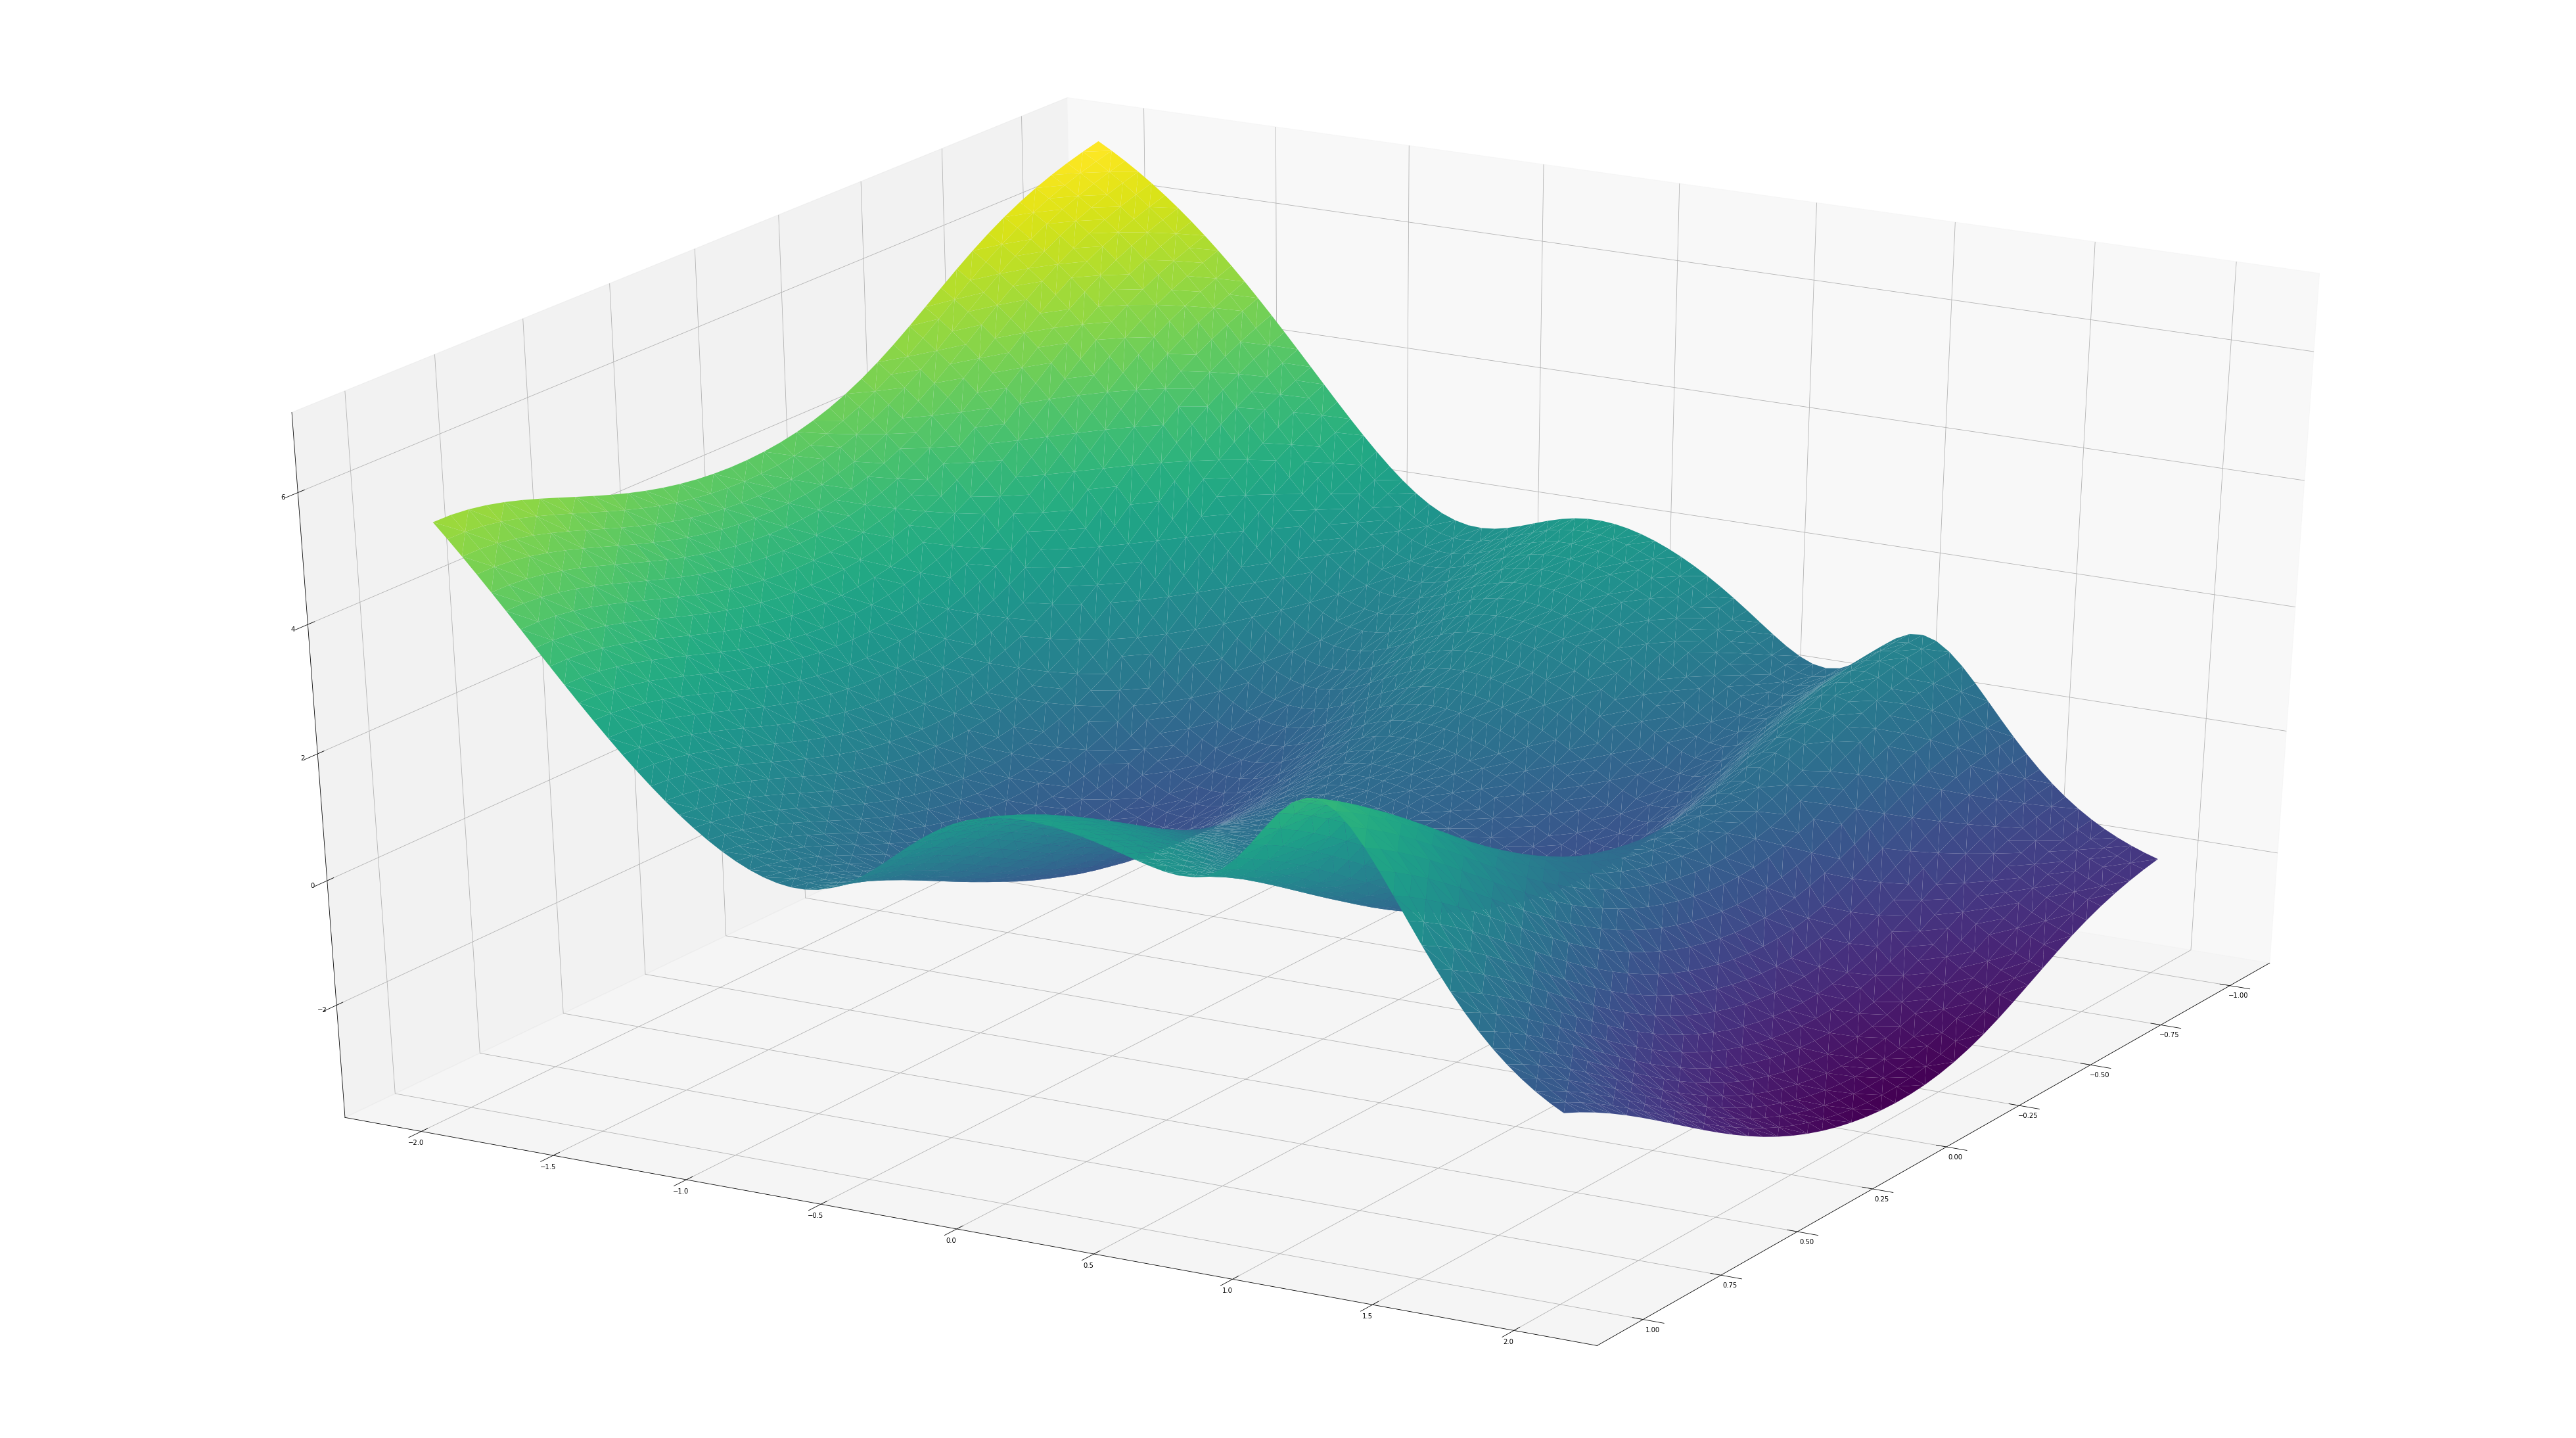

In [38]:
plotting()